In [1]:
# Import packages 
import numpy as np
import matplotlib.pyplot as plt 
from numpy.random import * 
from numpy.linalg import *
import time


In [164]:
# basic mu-MIMO Transmitter and Receiver 
K = 2   # number of users 
N = 2   # number of receiver antennas 
M = 4   # Degree of constellation 
T_total = int(1e4) # total time steps 


def make_symbol_space(K, M, cp):
    """
    constructs symbol space with Cardinality : M^K 
    can be used for ML detection 
    """
    index_space = np.indices([M for _ in range(K)]).reshape(K, -1).T 
    symbol_space = np.take(cp, index_space)
    return symbol_space 

# simple constellation points (normalized)
constellation_points = np.array([-1-1j, -1+1j, 1-1j, 1+1j])
constellation_points /= np.sqrt(2) 

# for Maximum-Likelihood detection
symbol_space = make_symbol_space(K, M, cp=constellation_points) 

# symbols for 1-timeslot 
x = np.random.randint(0, M, size=K).reshape(-1, 1) 
x = np.take(constellation_points, x)

# Rayleigh Fading Channel 
H = np.random.randn(N, K) + 1j * np.random.randn(N, K) 
z = np.random.randn(N, 1) + 1j * np.random.randn(N, 1) 

# Received Signal 
r = np.matmul(H, x) + z 

In [10]:
K = 20
N = 20
num_symbols = int(1e5)
T = num_symbols // K
SNR = 30
sers_avg = np.zeros(SNR)
for i in range(100):
    sers = []    
    for snr in np.arange(0, SNR, 1):
        ts = time.time()
        x = randint(0, 2, size=(T, K, 1)) * 2 - 1 
        H = 1/np.sqrt(2) * (randn(T, N, K) + 1j * randn(T, N, K))
        n = 1/np.sqrt(2) * (randn(T, N ,1) + 1j * randn(T, N ,1)) 
        print("calculating ser for snr : ", snr, end=" ------> ")
        r = np.matmul(H, x) + 10 ** (-snr/20) * n 

        # zero-forcing 
        W = pinv(H) 

        x_hat = np.matmul(W, r) 
        ep = np.sum(np.array(x_hat > 0) * 2 - 1 != x)
        sers.append(ep) 
        te = time.time()
        print("Symbol error rate: ", ep / num_symbols,)
        print(f"    Elapsed time: {te-ts:.2f} seconds", f"ETA : {(te-ts) * (SNR-snr):.2f}s")

    sers = np.array(sers) / num_symbols 
    
    sers_avg += sers 

sers_avg /= SNR 

calculating ser for snr :  0 ------> Symbol error rate:  0.1459
    Elapsed time: 1.24 seconds ETA : 37.30s
calculating ser for snr :  1 ------> Symbol error rate:  0.12681
    Elapsed time: 0.87 seconds ETA : 25.09s
calculating ser for snr :  2 ------> Symbol error rate:  0.10963
    Elapsed time: 0.83 seconds ETA : 23.31s
calculating ser for snr :  3 ------> Symbol error rate:  0.08941
    Elapsed time: 1.08 seconds ETA : 29.27s
calculating ser for snr :  4 ------> Symbol error rate:  0.07956
    Elapsed time: 0.82 seconds ETA : 21.28s
calculating ser for snr :  5 ------> Symbol error rate:  0.06238
    Elapsed time: 0.82 seconds ETA : 20.50s
calculating ser for snr :  6 ------> Symbol error rate:  0.05089
    Elapsed time: 0.83 seconds ETA : 20.01s
calculating ser for snr :  7 ------> Symbol error rate:  0.0441
    Elapsed time: 0.83 seconds ETA : 19.12s
calculating ser for snr :  8 ------> Symbol error rate:  0.03466
    Elapsed time: 0.82 seconds ETA : 18.09s
calculating ser for s

[0.1422  0.12607 0.1098  0.09154 0.07761 0.06178 0.05224 0.04373 0.03433
 0.02899 0.02351 0.01962 0.0164  0.01332 0.01047 0.0069  0.00613 0.00507
 0.00429 0.00285 0.00281 0.00169 0.00169 0.00117 0.00148 0.00088 0.00053
 0.00071 0.00039 0.00047]


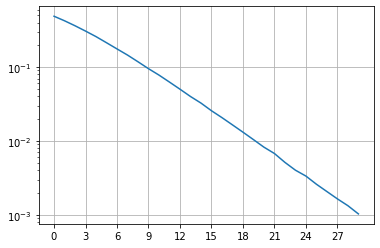

In [14]:
print(sers)
plt.semilogy(sers_avg)
plt.grid() 
plt.xticks(np.arange(0, 30, 3)) 
plt.show()

In [110]:
rs = []
for t in range(T_total):
    x = np.random.randint(0, 2, size=(2, 1))
    H = np.random.randn(4, 2) + 1j * np.random.randn(4, 2) 
    n = np.random.randn(4, 1) + 1j * np.random.randn(4, 1) 

    r = np.matmul(H, x) + n 
    rs.append(r) 

rs = np.array(rs) 
rs.shape

(10000, 4, 1)

In [140]:
x = randint(0, 2, size=(2 * T_total)) * 2 - 1
x = np.kron(x, np.ones(shape=(4, 1))).reshape(4, 2, T_total) 

H = randn(4, 2, T_total) + 1j * randn(4, 2, T_total) 
n = randn(4, T_total) + 1j * randn(4, T_total) 

r = np.squeeze(np.sum(H * x, axis=1)) + n

W = np.zeros(shape=(2, 4, T_total), dtype=np.complex64)
for i in range(T_total):
    W[:, :, i] = np.linalg.pinv(H[:, :, i])



In [144]:
H[:, :, :4]

array([[[ 4.09281640e-01+0.1144636j , -1.92146312e+00+0.43972927j,
          8.27941209e-01-0.69267624j,  3.39503117e-01+0.72819997j],
        [ 3.64055663e-01-1.68040779j, -1.50020415e+00-0.43285463j,
          2.36948010e-01+0.34697187j, -1.64333030e+00-0.42361574j]],

       [[ 1.48222825e+00-0.3510616j ,  1.42430640e+00+0.84168246j,
          6.18778946e-01+0.69008527j,  5.95621716e-02-0.5509601j ],
        [ 5.35773704e-01-2.31845957j,  3.85877627e-02+0.23724748j,
          2.91826828e-02-1.85278045j, -7.96841314e-02-0.68758783j]],

       [[-2.54518832e-01+0.00345756j,  6.22823609e-01-0.39169038j,
         -1.10368795e+00+1.22790856j, -5.40626390e-01-1.44184821j],
        [-2.15490700e-01-0.19451167j, -2.54272084e-01-0.20385943j,
         -1.02789616e+00+0.92176138j, -6.20728786e-01-1.33313818j]],

       [[-9.34485511e-01+0.81975866j, -1.89642595e-03+0.21007611j,
         -1.95596335e+00-0.70818673j,  2.66075625e-01+0.31567189j],
        [-6.54011999e-01-0.17490529j,  1.41810390

In [15]:
import os 

os.makedirs("results", exist_ok=True) 


In [17]:
np.save("./results/sers_avg_conventional_zero_forcing", sers_avg)

In [19]:
sers_load = np.load("./results/sers_avg_conventional_zero_forcing.npy")

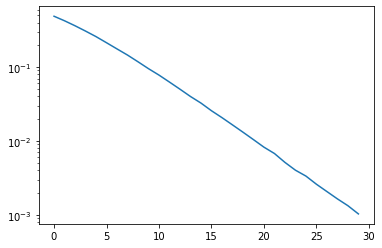

In [21]:
plt.semilogy(sers_load)